In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Load example images
images_dir = '../data/examples/'
image_names = [f for f in os.listdir(images_dir)]
image_paths = [os.path.join(images_dir, f) for f in image_names]
images = [cv.imread(img) for img in image_paths]
images = [cv.cvtColor(img, cv.COLOR_BGR2RGB) for img in images]

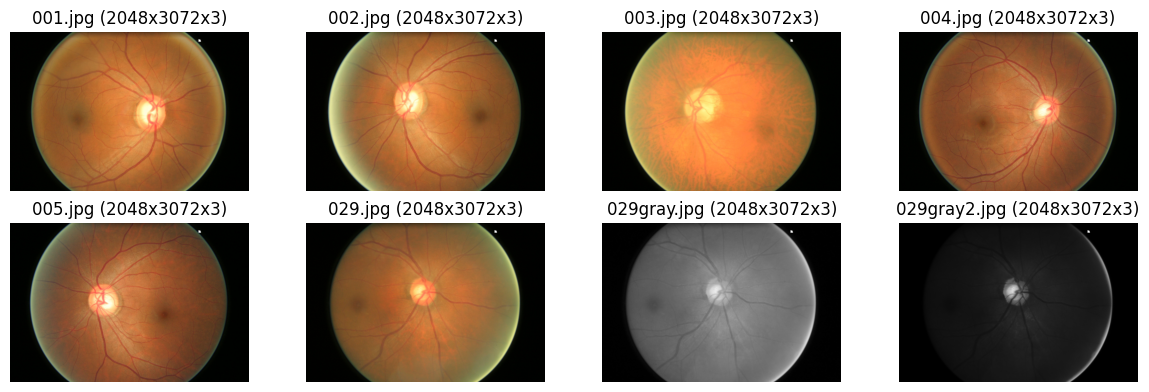

In [4]:
# Plot images in a 2x4 grid
fig, axs = plt.subplots(2, 4, figsize=(12, 4))
for i, ax in enumerate(axs.flat):
    shape = images[i].shape
    ax.imshow(images[i])
    ax.set_title(f'{image_names[i]} ({shape[0]}x{shape[1]}x{shape[2]})')
    ax.axis('off')
plt.tight_layout()
plt.show()

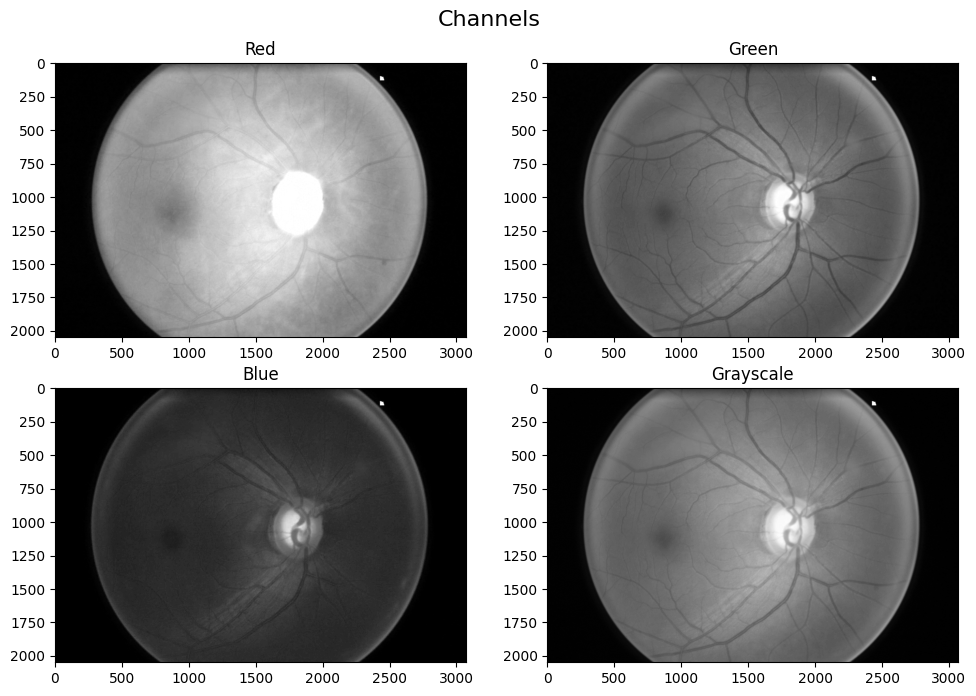

In [5]:
img = images[0]

# Split channels
r, g, b = cv.split(img)

# Convert to grayscale
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Plot channels
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Channels', fontsize=16)
axs[0, 0].imshow(r, cmap='gray')
axs[0, 0].set_title('Red')
axs[0, 1].imshow(g, cmap='gray')
axs[0, 1].set_title('Green')
axs[1, 0].imshow(b, cmap='gray')
axs[1, 0].set_title('Blue')
axs[1, 1].imshow(gray, cmap='gray')
axs[1, 1].set_title('Grayscale')
plt.tight_layout()
plt.show()

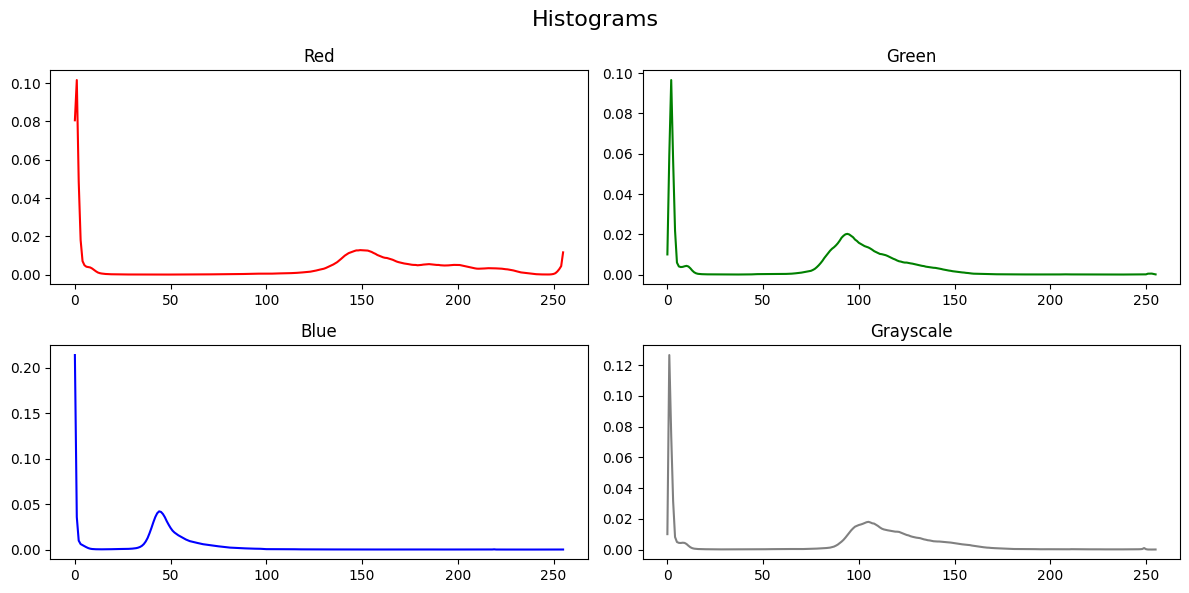

In [6]:
# Compute histograms
r_hist = cv.calcHist([r], [0], None, [256], [0, 256])
g_hist = cv.calcHist([g], [0], None, [256], [0, 256])
b_hist = cv.calcHist([b], [0], None, [256], [0, 256])
gray_hist = cv.calcHist([gray], [0], None, [256], [0, 256])

# Normalize histograms
r_hist = r_hist / np.sum(r_hist)
g_hist = g_hist / np.sum(g_hist)
b_hist = b_hist / np.sum(b_hist)
gray_hist = gray_hist / np.sum(gray_hist)

# Plot histograms
plt.subplots(2, 2, figsize=(12, 6))
plt.suptitle('Histograms', fontsize=16)
plt.subplot(221)
plt.plot(r_hist, color='r')
plt.title('Red')
plt.subplot(222)
plt.plot(g_hist, color='g')
plt.title('Green')
plt.subplot(223)
plt.plot(b_hist, color='b')
plt.title('Blue')
plt.subplot(224)
plt.plot(gray_hist, color='gray')
plt.title('Grayscale')
plt.tight_layout()
plt.show()